# DBSCAN Clustering

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy
%matplotlib inline
plt.style.use('seaborn')

In [2]:
import numpy as np
import sklearn
import matplotlib
import pandas as pd
import sys
libraries = (('Matplotlib', matplotlib), ('Numpy', np), ('Pandas', pd))

print("Python Version:", sys.version, '\n')
for lib in libraries:
    print('{0} Version: {1}'.format(lib[0], lib[1].__version__))

Python Version: 3.6.2 |Anaconda custom (64-bit)| (default, Sep 21 2017, 18:29:43) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)] 

Matplotlib Version: 2.0.2
Numpy Version: 1.12.1
Pandas Version: 0.20.3


In [3]:
import numpy as np
import pandas as pd

class dbscan:
    
    def __init__(self, epsilon=0.5, min_points=5):
        self.epsilon = epsilon
        self.min_points = min_points
        self.data_cols = None
        self.labels_ = None
        self.neighbors = {}
        
    def fit(self, X):
        X = self.pandas_to_numpy(X)
        if not self.data_cols:
            self.data_cols = X.shape[1]
        self.check_feature_shape(X)
        self.visited_points = []
        self.clusters = []
        
        for ix in range(X.shape[0]):
            if ix in self.visited_points:
                continue
            self.neighbors[ix] = self.get_neighbors(ix, X)
            if len(self.neighbors[ix]) >= self.min_points:
                self.visited_points.append(ix)
                self.clusters.append(self.make_cluster(ix, X))
                
        self.labels_ = self.get_labels(X)
        
    def get_labels(self, X):
        labels = [-1]*X.shape[0]
        for clst_id, cluster in enumerate(self.clusters):
            for pt_id in cluster:
                labels[pt_id] = clst_id
        return np.array(labels)
            
    def make_cluster(self, ix, X):
        cluster = [ix]
        for neighbor in self.neighbors[ix]:
            if neighbor not in self.visited_points:
                self.visited_points.append(neighbor)
                self.neighbors[neighbor]= self.get_neighbors(ix, X)
                if len(self.neighbors[neighbor]) >= self.min_points:
                    cluster_from_neighbor = self.make_cluster(neighbor, X)
                    cluster = cluster + cluster_from_neighbor
                else:
                    cluster.append(neighbor)
        return cluster
          
    def fit_predict(self,X):
        self.fit(X)
        return self.labels_
    
    def get_neighbors(self, ix, X):
        neighbors = []
        pt = X[ix]
        for ix2, pt2 in enumerate(X):
            dist = np.sqrt(np.sum((pt2 - pt)**2)) 
            if dist <= self.epsilon:
                neighbors.append(ix2)
        return neighbors
        
    def check_feature_shape(self, x):
        """
        Helper function to make sure any new data conforms to the fit data shape
        ---
        In: numpy array, (unknown shape)
        Out: numpy array, shape: (rows, self.data_cols)"""
        return x.reshape(-1,self.data_cols)
        
    def rbf_kernel(self, x1, x2, sig=1.):
        """
        Returns the rbf affinity between two points (x1 and x2),
        for a given bandwidth (standard deviation).
        ---
        Inputs: 
            x1; point 1(array)
            x2; point 2(array)
            sig; standard deviation (float)
        """
        diff = np.sum((x1-x2)**2)
        norm = 1/(np.sqrt(2*np.pi*sig**2))
        return norm*np.exp(-diff/(2*sig**2))
    
    def pandas_to_numpy(self, x):
        """
        Checks if the input is a Dataframe or series, converts to numpy matrix for
        calculation purposes.
        ---
        Input: X (array, dataframe, or series)
        
        Output: X (array)
        """
        if type(x) == type(pd.DataFrame()) or type(x) == type(pd.Series()):
            return x.as_matrix()
        if type(x) == type(np.array([1,2])):
            return x
        return np.array(x)
    
   

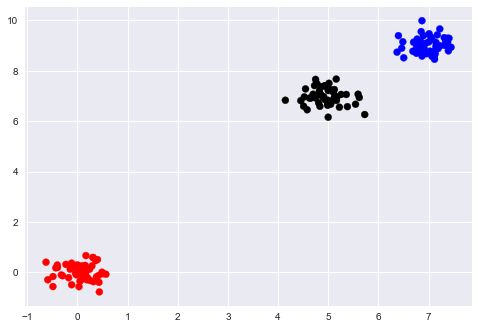

In [4]:
np.random.seed(24)
def get_data(n_clust = 3, n_points=50):
    X1 = np.random.normal(0,.3,n_points).reshape(-1,1)
    y1 = np.random.normal(0,.3,n_points).reshape(-1,1)
    for _ in range(n_clust-1):
        X2 = np.random.normal(np.random.randint(0,10),.3,n_points).reshape(-1,1)
        y2 = np.random.normal(np.random.randint(0,10),.3,n_points).reshape(-1,1)
        X1 = np.vstack((X1,X2)).reshape(-1,1)
        y1 = np.vstack((y1,y2)).reshape(-1,1)
    X = np.hstack((X1,y1))
    return X

X = get_data(n_clust=3, n_points=50)
c = ['r']*50+['b']*50+['k']*50
plt.scatter(X[:,0],X[:,1], c=c);

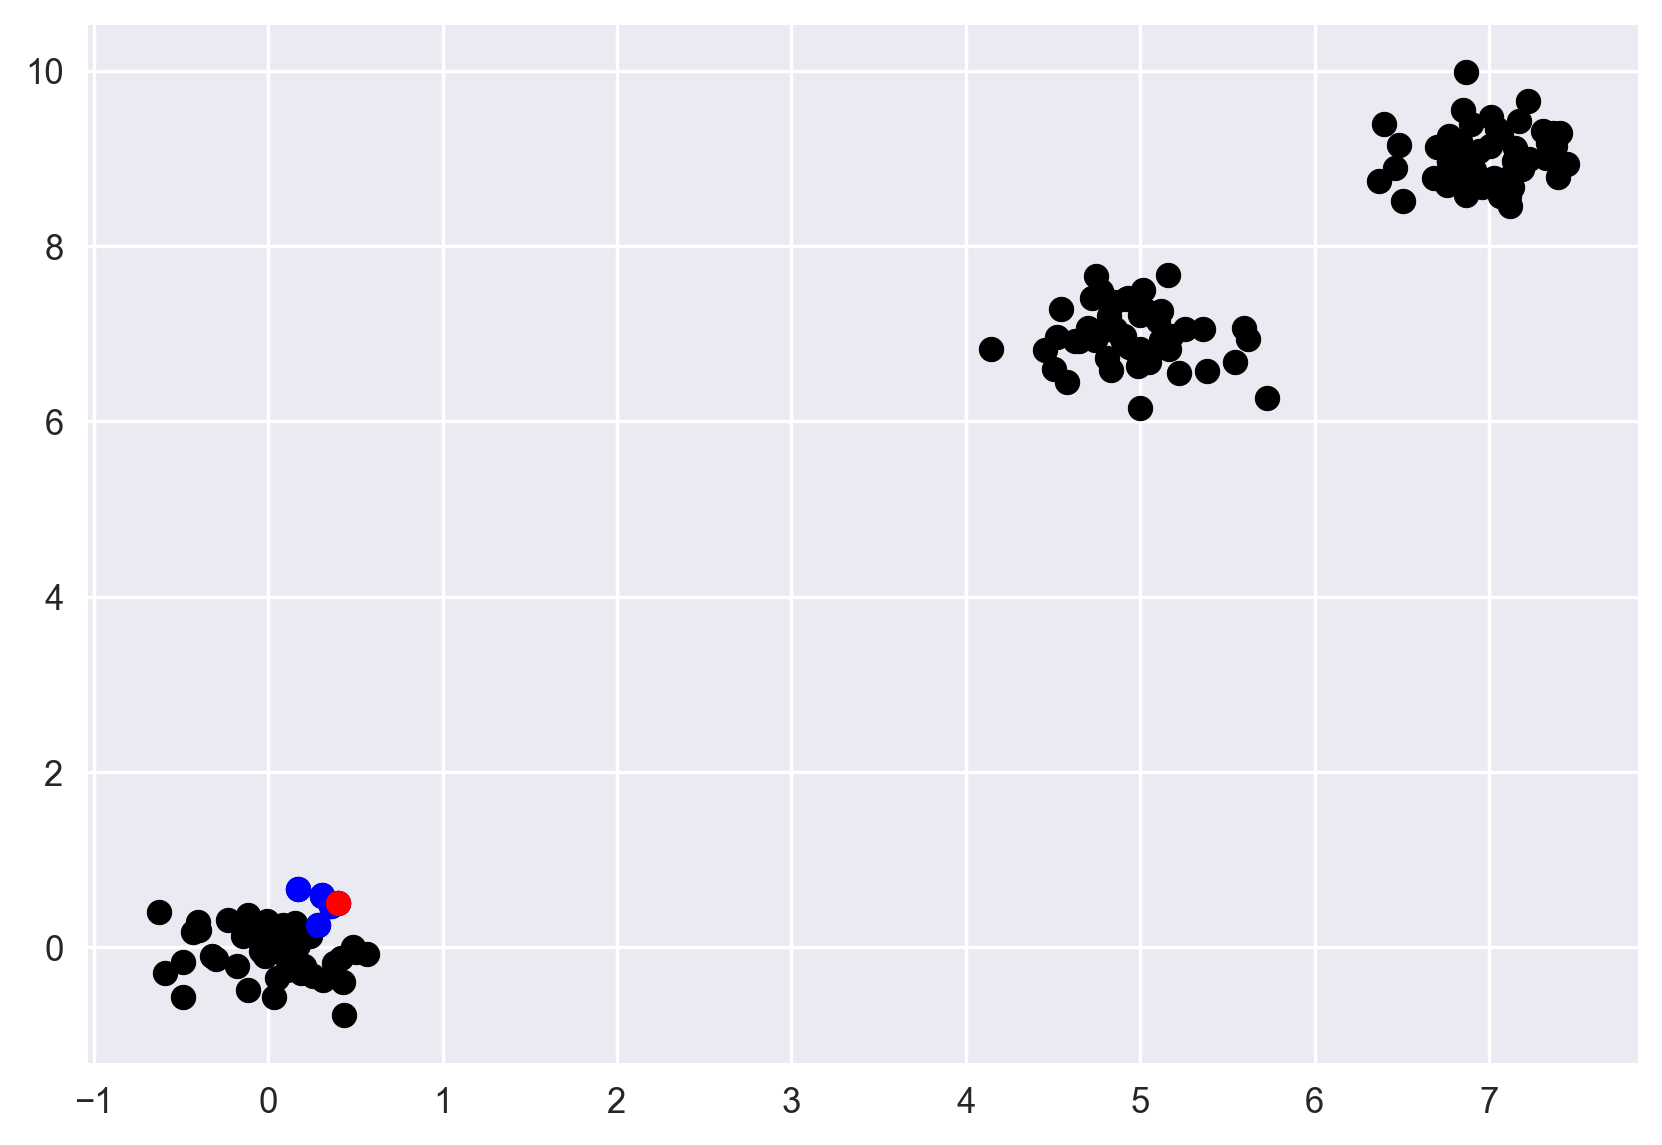

In [5]:
db = dbscan(epsilon=.3)
neighbs = db.get_neighbors(0, X)

plt.figure(dpi=250)
plt.scatter(X[:,0],X[:,1], c='k')
for ix in neighbs:
    plt.scatter(X[ix,0], X[ix,1], c='b')
plt.scatter(X[0,0], X[0,1], c='r');

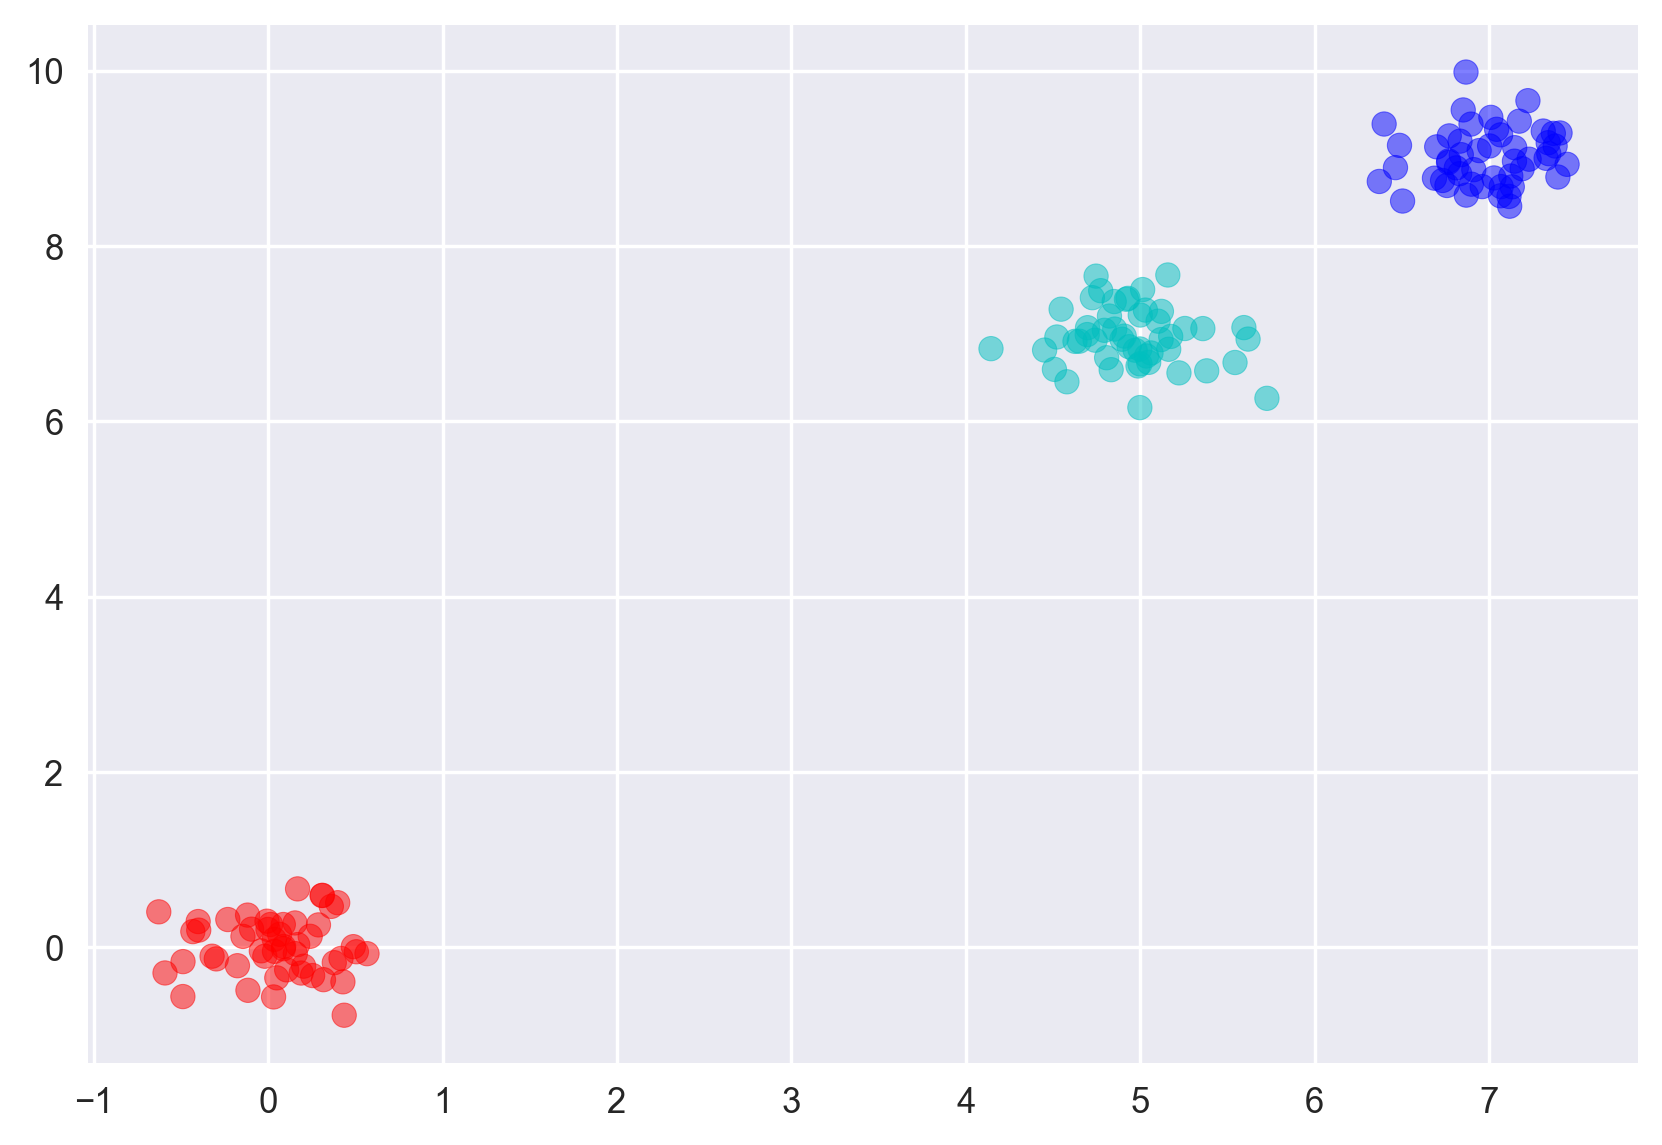

In [6]:
db = dbscan(epsilon=1, min_points=10)
db.fit(X)

color_possibilities = 'rbcmyg'
colors = []
for i in db.labels_:
    if i == -1:
        colors.append('k')
    else:
        colors.append(color_possibilities[i%len(color_possibilities)])
        
plt.figure(dpi=250)
plt.scatter(X[:,0],X[:,1], c=colors, alpha=0.5);

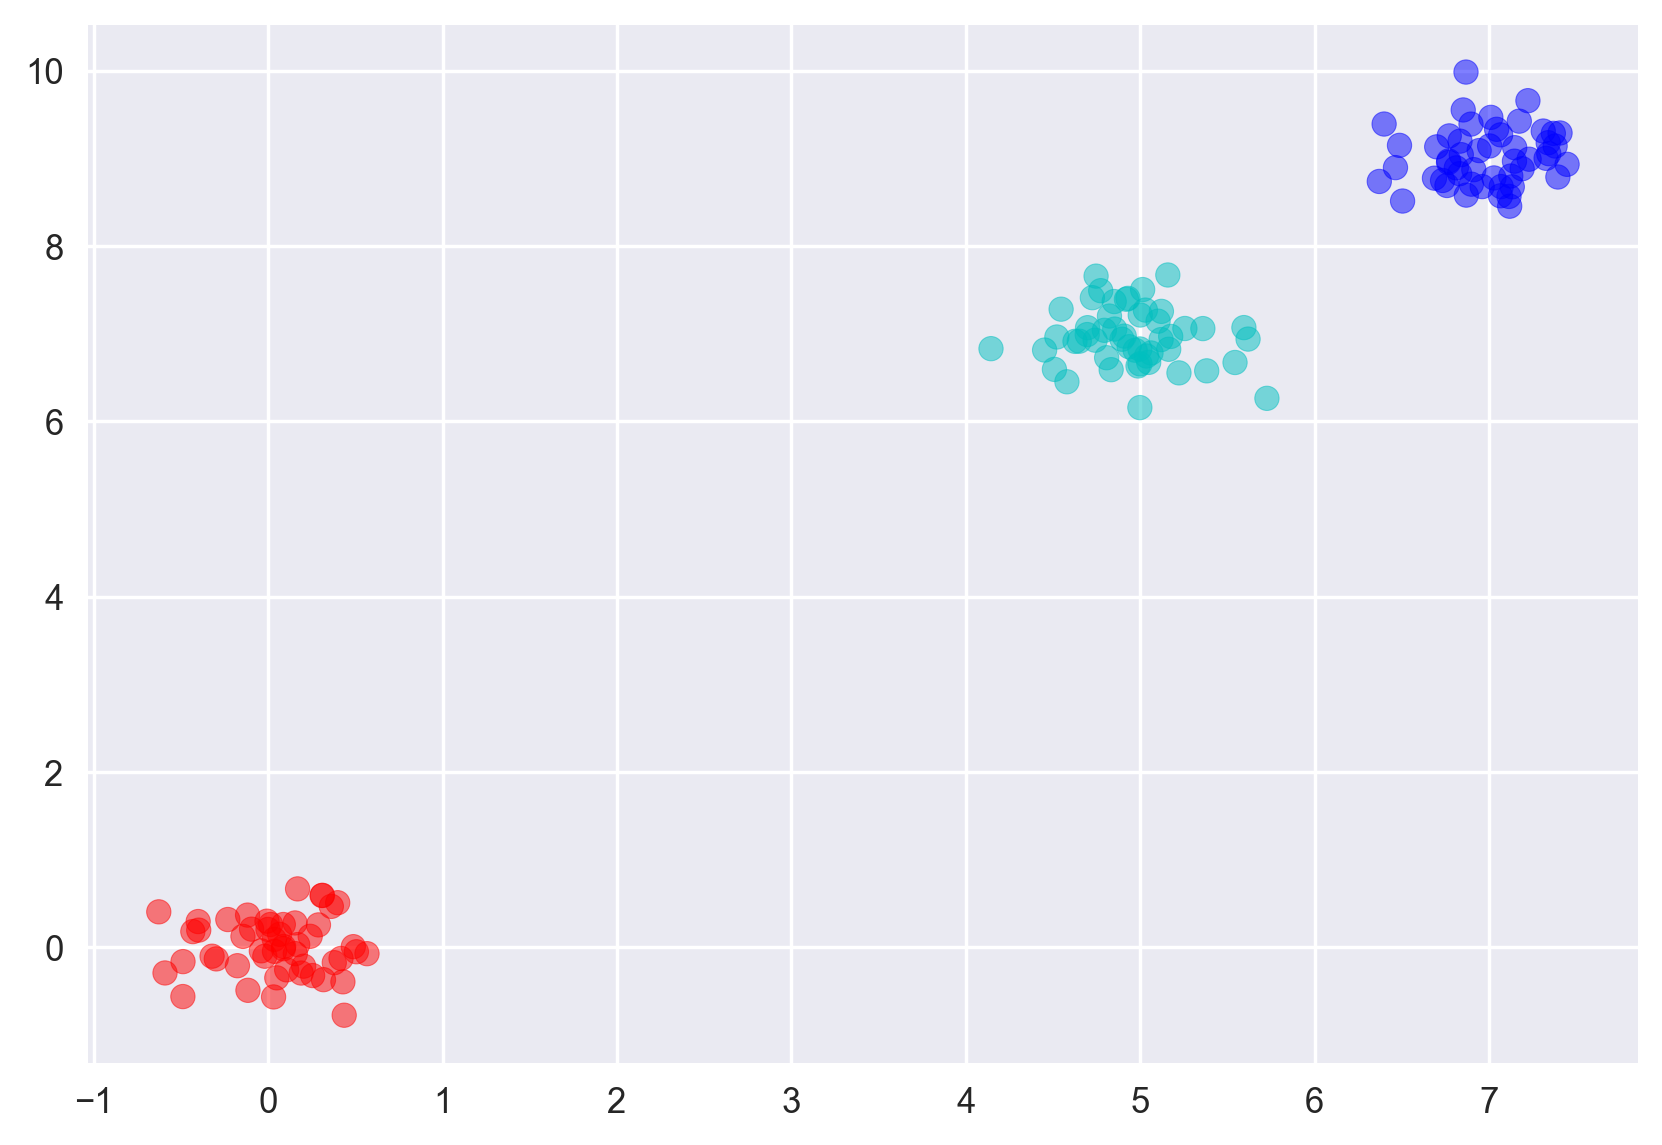

In [7]:
from sklearn.cluster import DBSCAN

db_sk = DBSCAN(eps=1., min_samples=10)
db_sk.fit(X)

color_possibilities = 'rbcmyg'
colors = []
for i in db_sk.labels_:
    if i == -1:
        colors.append('k')
    else:
        colors.append(color_possibilities[i%len(color_possibilities)])
        
plt.figure(dpi=250)
plt.scatter(X[:,0],X[:,1], c=colors, alpha=0.5);

## Test with circular data to make sure it works on non-blobs

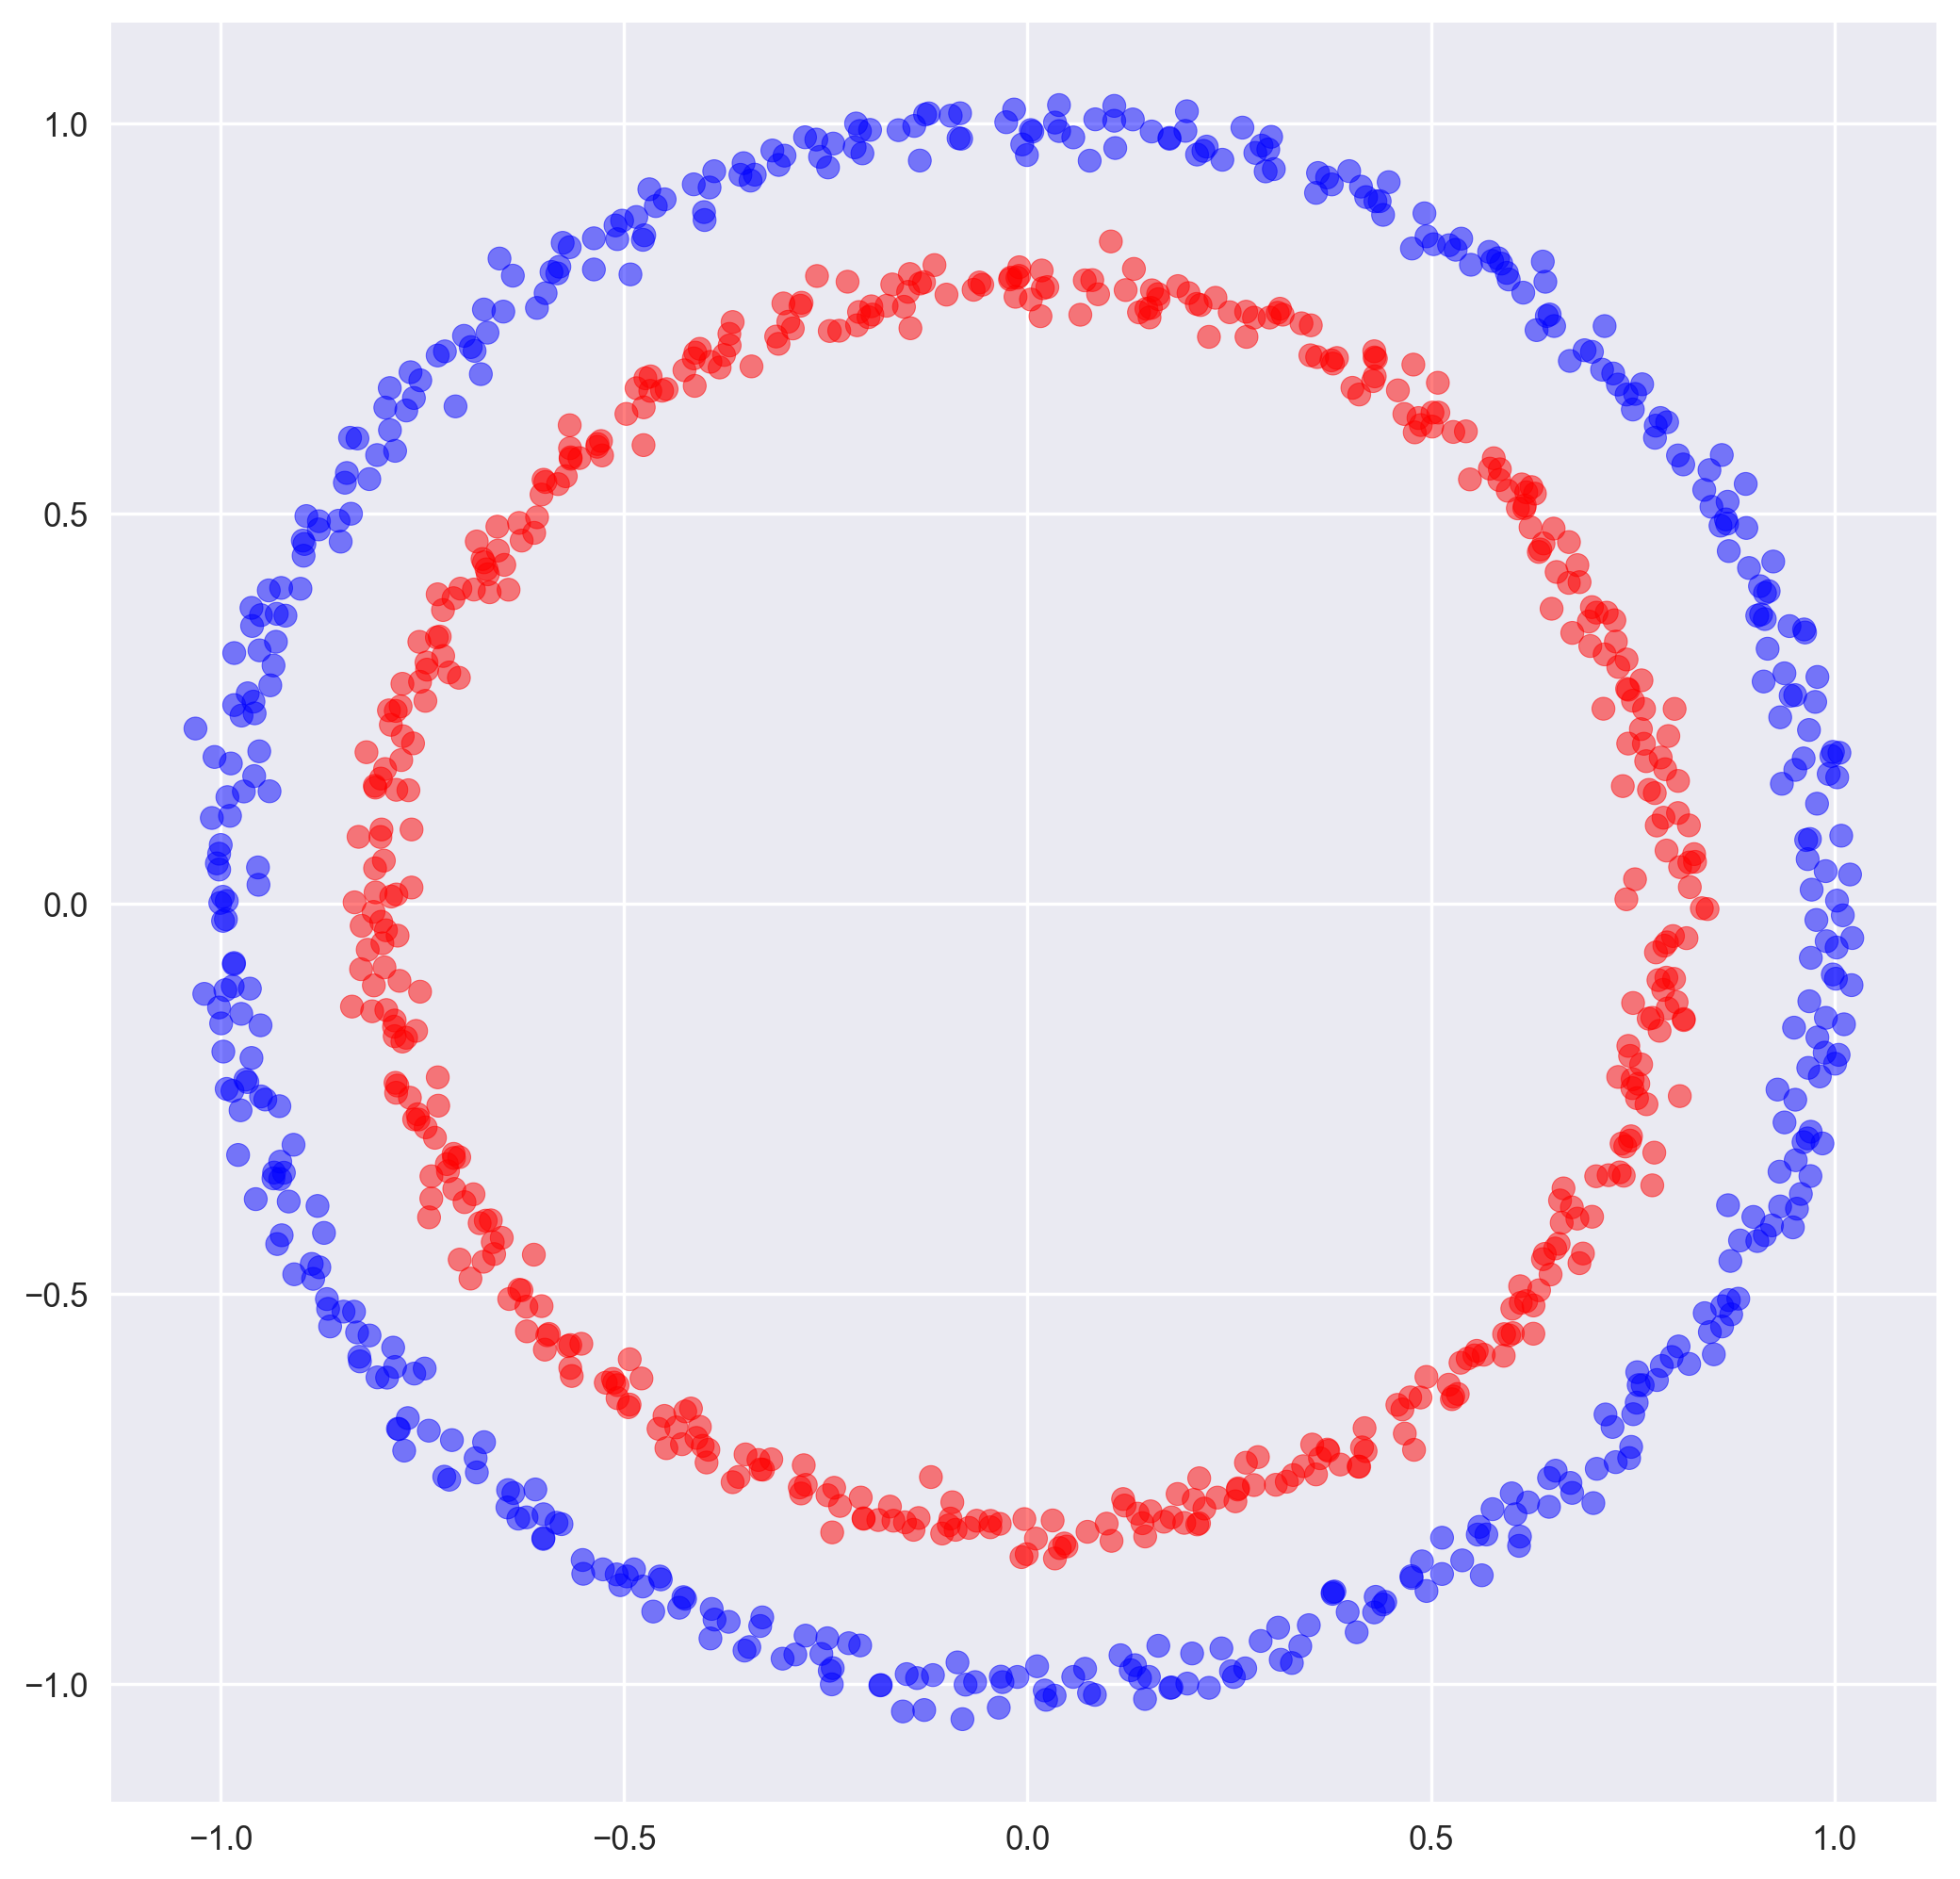

In [26]:
from sklearn.datasets import make_circles

circle_X = make_circles(n_samples=1000, shuffle=True, noise=0.02, random_state=42)
db_circ = dbscan(epsilon=0.1, min_points=5)
db_circ.fit(circle_X[0])

color_possibilities = 'rbcmyg'
colors = []
for i in db_circ.labels_:
    if i == -1:
        colors.append('k')
    else:
        colors.append(color_possibilities[i%len(color_possibilities)])
plt.figure(figsize=(10,10), dpi=250)
circle_x, circle_y = zip(*circle_X[0])
plt.scatter(circle_x, circle_y, c=colors, alpha=0.5);

## Test in 3D

In [154]:
np.random.seed(42)
def get_multidim_data(n_clust = 3, num_dim=3):
    X = np.random.normal(-5,1,size=(50,3))

    for _ in range(n_clust-1):
        X2 = np.random.normal(np.random.randint(-10,10),1,size=(50,3))
        X = np.vstack((X,X2))
    return X

X = get_multidim_data(n_clust=5)

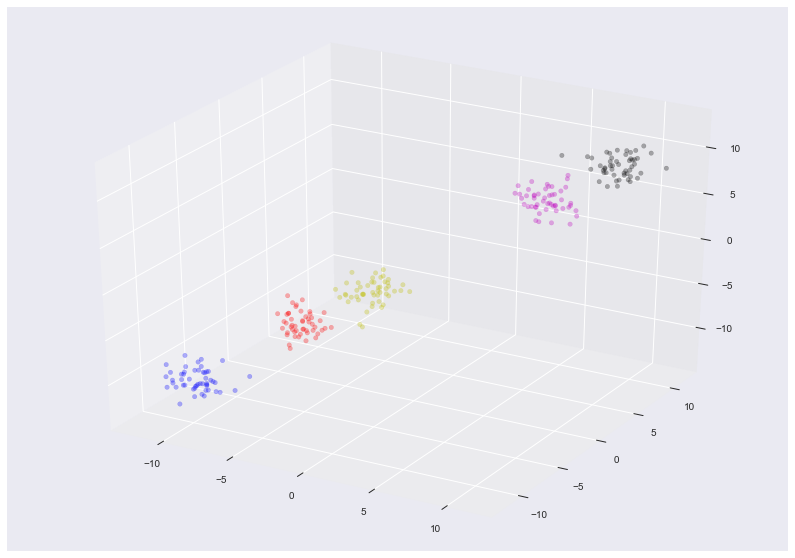

In [155]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14,10))
ax = fig.gca(projection='3d')
col = ['r']*50+['b']*50+['y']*50+['m']*50+['k']*50

xplot, yplot, zplot = zip(*X)
ax.scatter(xplot,yplot, zplot, c=col,alpha=0.3);

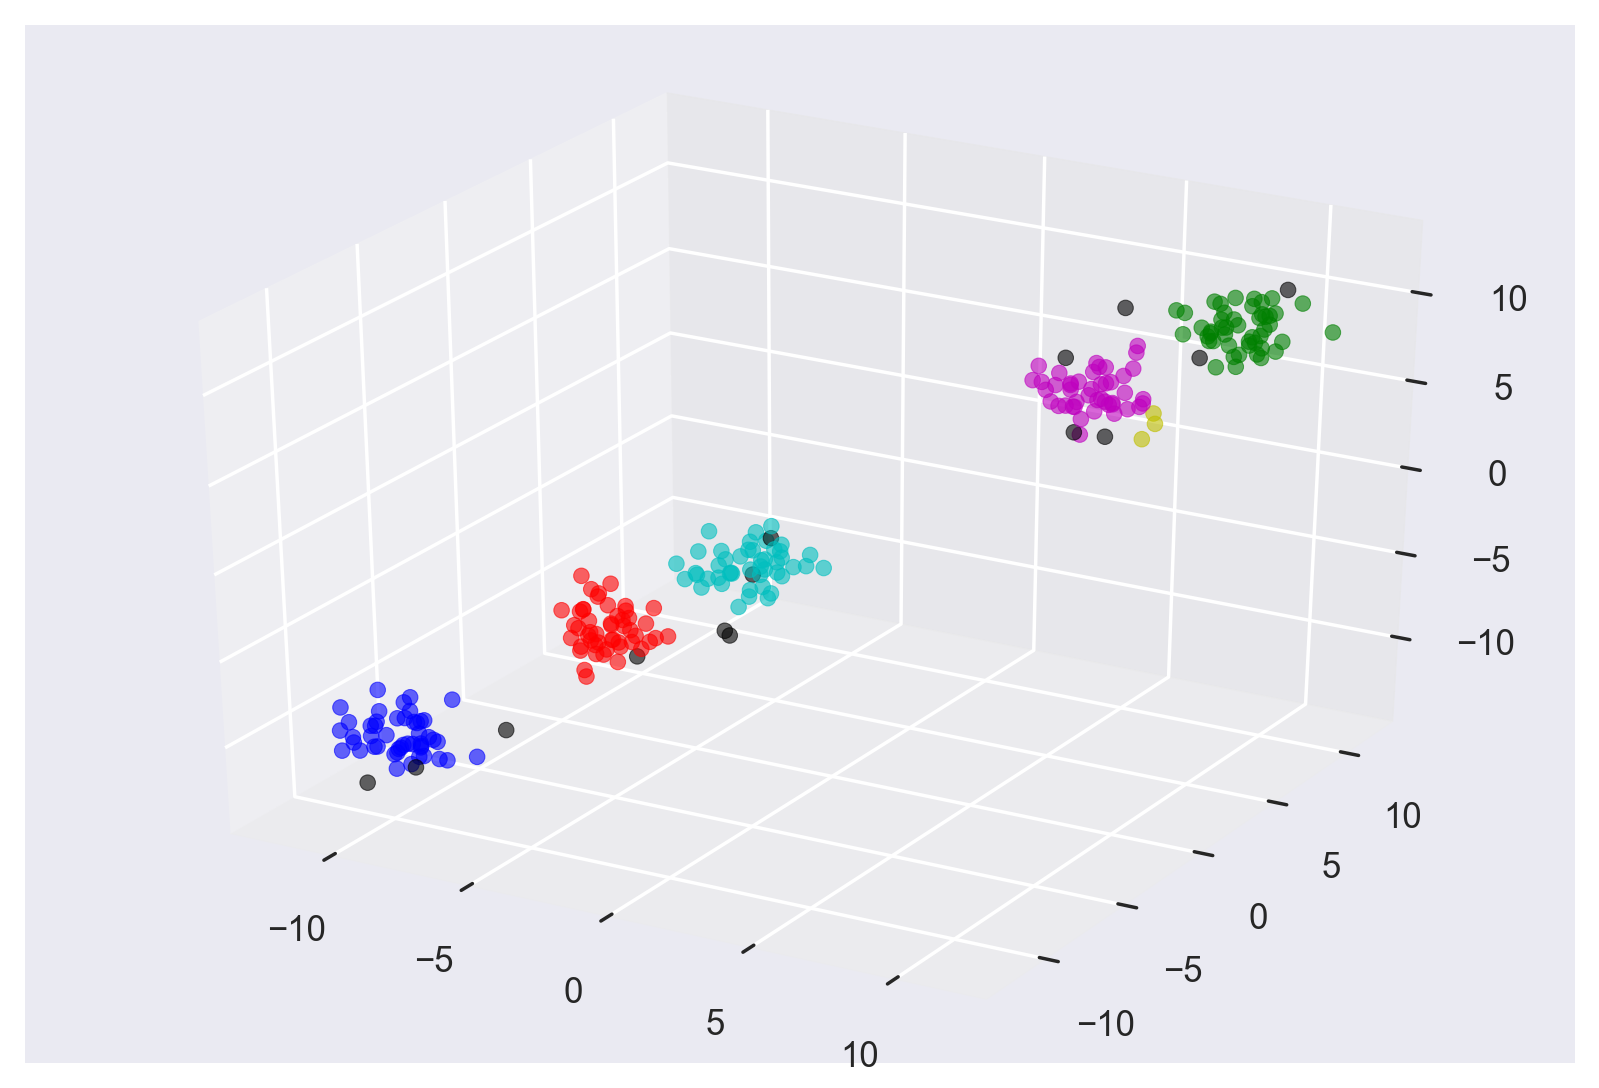

In [160]:
db = dbscan(epsilon=1.8, min_points=8)
preds = db.fit_predict(X)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(dpi=250)
ax = fig.gca(projection='3d')

color_possibilities = 'rbcmyg'
colors = []
for i in db.labels_:
    if i == -1:
        colors.append('k')
    else:
        colors.append(color_possibilities[i%len(color_possibilities)])

xplot, yplot, zplot = zip(*X)
ax.scatter(xplot,yplot, zplot, c=colors,alpha=0.6);


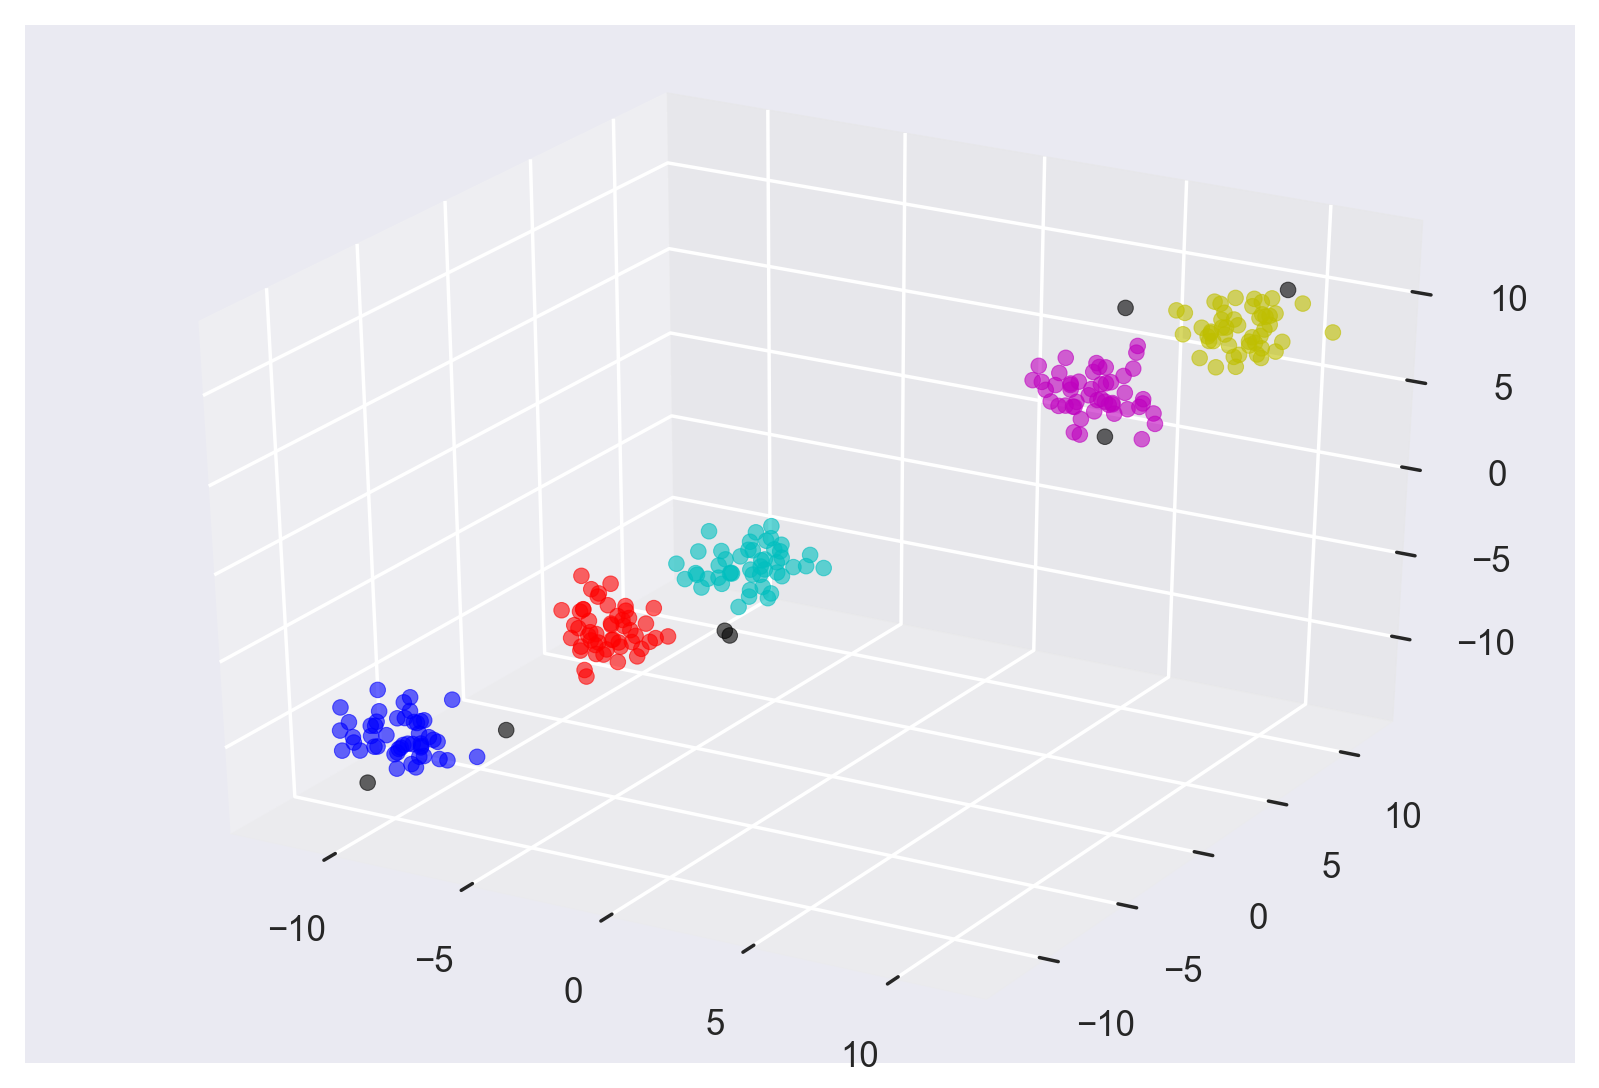

In [161]:
from sklearn.cluster import DBSCAN

db_sk = DBSCAN(eps=1.8, min_samples=8)
db_sk.fit(X)

fig = plt.figure(dpi=250)
ax = fig.gca(projection='3d')

color_possibilities = 'rbcmyg'
colors = []
for i in db_sk.labels_:
    if i == -1:
        colors.append('k')
    else:
        colors.append(color_possibilities[i%len(color_possibilities)])
        
xplot, yplot, zplot = zip(*X)
ax.scatter(xplot,yplot, zplot, c=colors,alpha=0.6);